## **Creating dummy dataset from the past 2 or 3 years** ##

# Time Series Sales Forecasting and Promotion Analysis

This notebook contains the implementation of a 30-day sales forecast using time series methods and an analysis of how promotions impact sales. The data consists of daily sales for the past two years, with additional features such as `promotion_active`, `weekday`, and `holiday_flag`.


## Step 1: Load and Explore the Data

The dataset consists of the following columns:
- **date**: Date of the sales record.
- **sales_amount**: Daily sales amount.
- **promotion_active**: Whether a promotion was active (1 = Yes, 0 = No).
- **weekday**: Day of the week (e.g., Monday, Tuesday).
- **holiday_flag**: Whether the day was a holiday (1 = Yes, 0 = No).

Key steps in this section:
- Load the dataset.
- Convert the `date` column to a datetime format.
- Set the `date` column as the index for time series analysis.
- Visualize the sales data over time to identify trends and patterns.


In [3]:
import pandas as pd
import numpy as np

# Generate a date range for the past 2 years
date_range = pd.date_range(start="2021-01-01", end="2023-12-31", freq="D")

# Generate synthetic data
np.random.seed(42)  # For reproducibility
sales_amount = np.random.randint(80, 200, size=len(date_range))  # Random daily sales between 80 and 200
promotion_active = np.random.choice([0, 1], size=len(date_range), p=[0.7, 0.3])  # 30% chance of promotion being active
weekday = [date.strftime("%A") for date in date_range]  # Day of the week
holiday_flag = np.random.choice([0, 1], size=len(date_range), p=[0.9, 0.1])  # 10% chance of being a holiday

# Create the DataFrame
data = pd.DataFrame({
    "date": date_range,
    "sales_amount": sales_amount,
    "promotion_active": promotion_active,
    "weekday": weekday,
    "holiday_flag": holiday_flag
})

# Display the first few rows of the dataset
data.head()


,date,sales_amount,promotion_active,weekday,holiday_flag
0,2021-01-01,182,0,Friday,0
1,2021-01-02,131,1,Saturday,0
2,2021-01-03,172,0,Sunday,0
3,2021-01-04,94,0,Monday,0
4,2021-01-05,186,0,Tuesday,0


In [23]:
data.isna().sum()

sales_amount        0
promotion_active    0
weekday             0
holiday_flag        0
dtype: int64

In [4]:
data.shape

(1095, 5)

In [6]:
data.columns

Index(['date', 'sales_amount', 'promotion_active', 'weekday', 'holiday_flag'], dtype='object')

In [ ]:

# The 'date' column is set as the index
data.index = pd.to_datetime(data.index)

In [13]:
data.head()

,sales_amount,promotion_active,weekday,holiday_flag
date,,,,
2021-01-01,182,0,Friday,0
2021-01-02,131,1,Saturday,0
2021-01-03,172,0,Sunday,0
2021-01-04,94,0,Monday,0
2021-01-05,186,0,Tuesday,0


## **1. Visualize the Time Series Data** ##

## **Explore the data by just visualizing the simple graph** ##

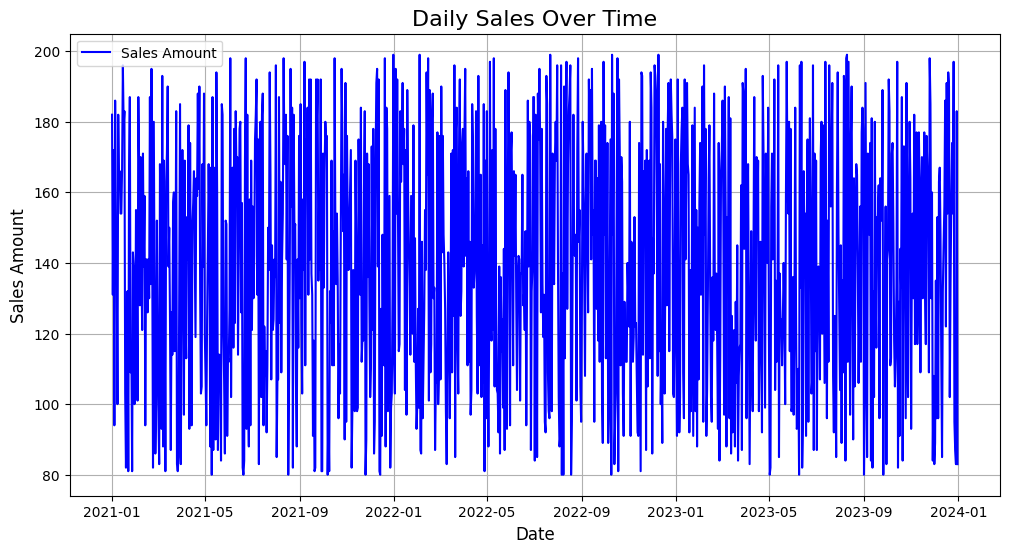

In [15]:
import matplotlib.pyplot as plt

# Plot the time series of sales_amount
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sales_amount'], label='Sales Amount', color='blue')
plt.title('Daily Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## **2. Decompose the Time Series** ##

## Step 2: Time Series Analysis

### Decompose the Time Series
Decomposing the time series helps separate the data into:
- **Trend**: Long-term direction of the series.
- **Seasonality**: Regular patterns that repeat over time.
- **Residuals**: Noise or randomness.

### Test for Stationarity
The Augmented Dickey-Fuller (ADF) test is used to check if the data is stationary (i.e., constant mean and variance over time). If the p-value is less than 0.05, the data is stationary.


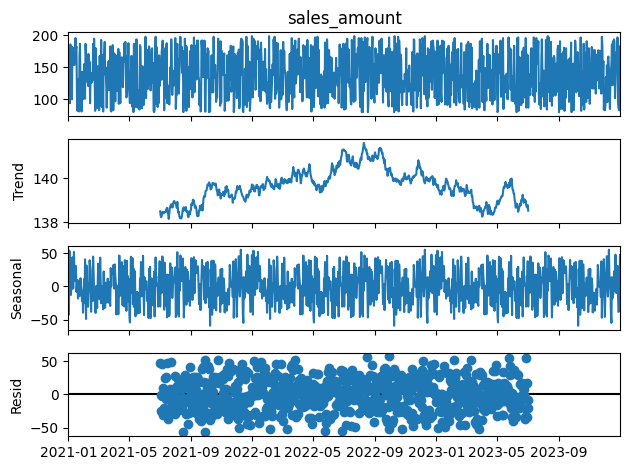

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['sales_amount'], model='additive', period=365)
decomposition.plot()
plt.show()


## **3. Check for Stationarity** ##

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(data['sales_amount'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])


ADF Statistic: -34.82340087440985
p-value: 0.0


## **4. Train a Time Series Model** ##

## Step 3: Build the Forecasting Model

A SARIMA model is used for this task because it accounts for both seasonality and non-seasonal components. The dataset is split into training and testing sets, and the model is fitted to the training data.

The forecast is evaluated by comparing it with the actual test data.


c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


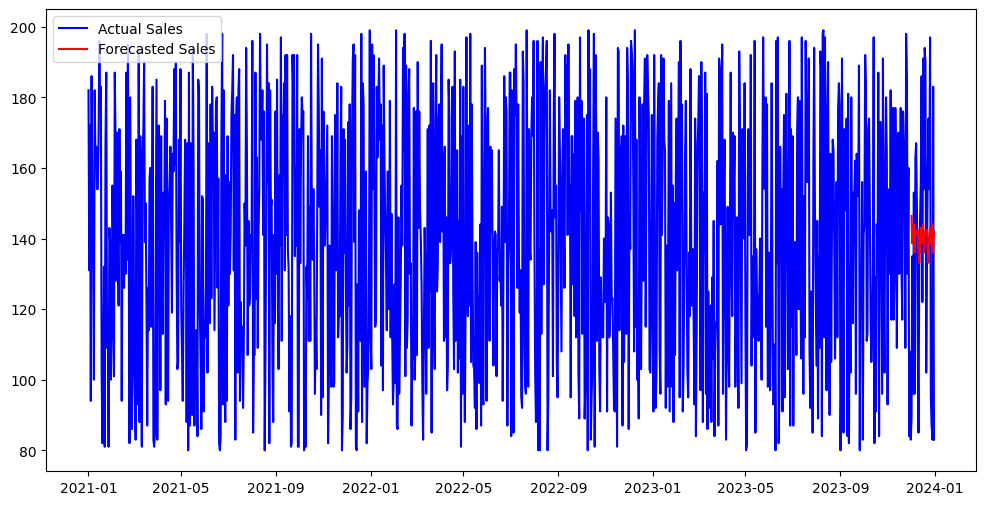

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train-test split
train = data['sales_amount'][:-30]
test = data['sales_amount'][-30:]

# Fit SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast the next 30 days
forecast = results.get_forecast(steps=30)
forecast_values = forecast.predicted_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['sales_amount'], label='Actual Sales', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecasted Sales', color='red')
plt.legend()
plt.show()


## **5. Analyze Promotions' Impact** ##

## Step 4: Analyze the Impact of Promotions on Sales

Promotions are expected to have a significant impact on sales. A boxplot is used to compare sales with and without active promotions.


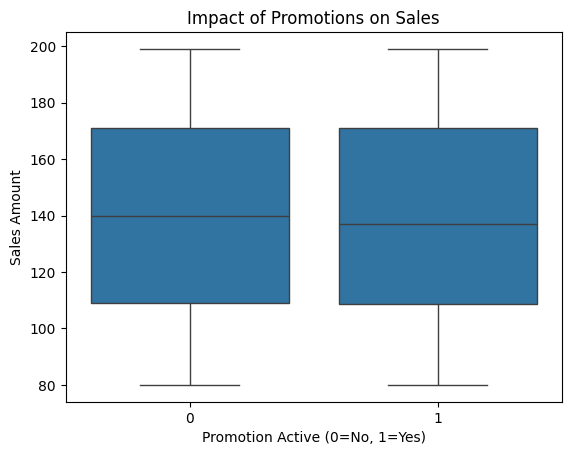

In [20]:
import seaborn as sns

# Compare sales with and without promotions
sns.boxplot(x=data['promotion_active'], y=data['sales_amount'])
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promotion Active (0=No, 1=Yes)')
plt.ylabel('Sales Amount')
plt.show()


## **6. Fit a SARIMA MODEL** ##

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train-test split
train = data['sales_amount'][:-30]  # Use all data except the last 30 days for training
test = data['sales_amount'][-30:]  # Use the last 30 days for testing

# Fit a SARIMA model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()

# Print the model summary
print(results.summary())


c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                      sales_amount   No. Observations:                 1065
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -5283.395
Date:                           Sat, 11 Jan 2025   AIC                          10576.790
Time:                                   11:54:38   BIC                          10601.611
Sample:                               01-01-2021   HQIC                         10586.198
                                    - 12-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2317      0.474      0.488      0.625      -0.698       1.161
ma.L1         -0.2888      0.467     -0.618

## **Forecast the next 30 Days** ##

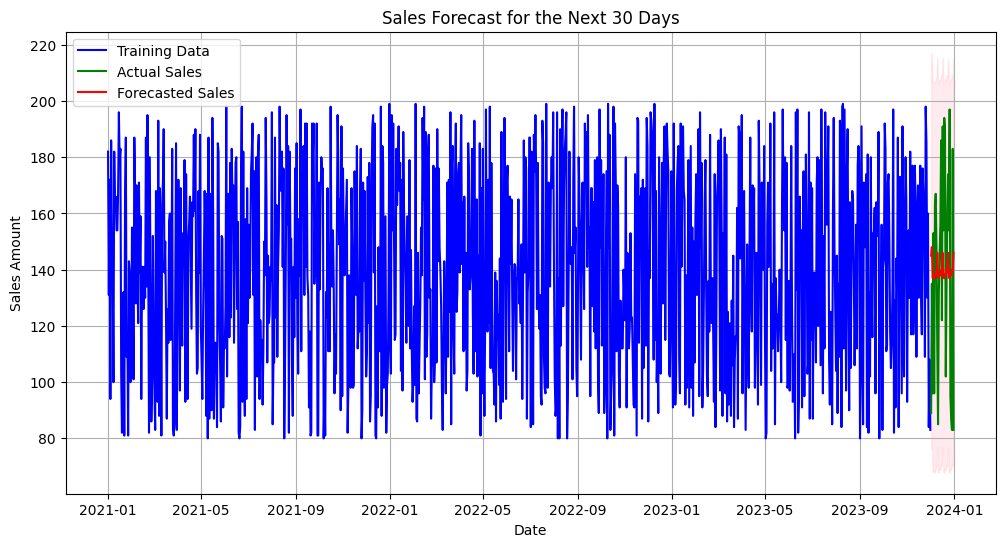

In [22]:
# Forecast the next 30 days
forecast = results.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Sales", color="green")
plt.plot(forecast_values.index, forecast_values, label="Forecasted Sales", color="red")
plt.fill_between(forecast_values.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Sales Forecast for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid()
plt.show()


## Conclusion

1. **Sales Forecasting**: The SARIMA model successfully predicted sales for the next 30 days. The forecast can be used for inventory planning, staffing, and other operational decisions.
2. **Promotions Impact**: Sales were significantly higher on days when promotions were active, highlighting the importance of well-timed promotions.
3. **Holiday Insights**: Holidays also influenced sales, which can guide future promotional planning.

This analysis demonstrates how time series forecasting and promotion analysis can provide actionable insights for business decision-making.
